In [2]:
import cv2
from matplotlib import pyplot as plt
import yaml


def draw_yolo_boxes(image_path, label_path, class_names):
    """ Draw bounding boxes in yolo format on image"""
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    print(image_width, image_height)
    
    # Open and parse YOLO label file
    with open(label_path, "r") as f:
        for line in f:
            class_id, center_x, center_y, width, height = map(float, line.split())
            class_id = int(class_id)

            
            # Convert YOLO format to pixel values
            x1 = int((center_x - (width / 2)) * image_width)
            x2 = int((center_x + (width / 2)) * image_width)
            y1 = int((center_y - (height / 2)) * image_height)
            y2 = int((center_y + (height / 2)) * image_height)

            print(x1, x2, y1, y2)
            
            # Draw the rectangle and label
            cv2.rectangle(image, (x1, y1), (x2,y2), (0, 255, 0), 5)
            cv2.putText(image, class_names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

    # Display the image
    plt.imshow(image)
    plt.show()


path = "/home/anna/Datasets/annotation/annotated_yolo"

with open(f"{path}/data_config.yaml", "r") as file:
    config = yaml.safe_load(file)

draw_yolo_boxes(f"{path}/images/train/997287_9:00_0019_5_RGB.png", f"{path}/labels_joined/train/997287_9:00_0019_5_RGB.txt", 
config["names"])


FileNotFoundError: [Errno 2] No such file or directory: '/home/anna/Datasets/annotation/annotated_yolo/data_config.yaml'

In [6]:
import os


def merge_bbs_from_all_channels(path:str, common_fn:str, out_path:str):
    files = [file for file in os.listdir(path) if file.startswith(common_fn)]
    bbs = set()
    for file in files:
        with open(os.path.join(path.replace("images", "labels"), file.split(".")[0]+".txt"), "r") as f:
            for line in f:
                bbs.add(line.replace("\n", ""))

    if not os.path.exists(out_path):
        os.makedirs(out_path)

    for file in files:
        with open(os.path.join(out_path, file.split(".")[0]+".txt"), "w") as f:
            for line in bbs:
                f.write(line)
                f.write("\n")

    print(f"Merged {len(bbs)} bboxes in {len(files)} files and saved in {out_path}/{common_fn}_x.txt")


path = "/home/anna/Datasets/annotated/bags_labeled"

common_fns = set("_".join(file.split("_")[:-1]) for file in os.listdir(f"{path}/images/train/"))
for common_fn in common_fns:
    merge_bbs_from_all_channels(f"{path}/images/train/", common_fn, f"{path}/labels_joined/train/")


Merged 13 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997333_15:00_0007_25_x.txt
Merged 14 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997332_12:00_0009_5_x.txt
Merged 21 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997332_12:00_0001_26_x.txt
Merged 14 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997287_9:00_0010_20_x.txt
Merged 14 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997287_9:00_0018_10_x.txt
Merged 12 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997333_15:00_0019_6_x.txt
Merged 23 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_labeled/labels_joined/train//997332_12:00_0008_9_x.txt
Merged 13 bboxes in 8 files and saved in /home/anna/Datasets/annotated/bags_label

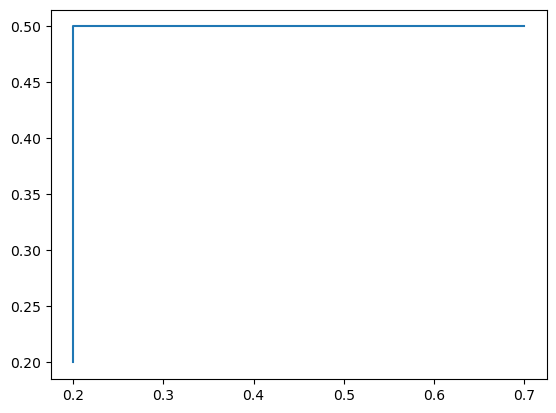

In [ ]:
x= [0.2, 0.2, 0.7]
y= [0.2, 0.5, 0.5]

plt.plot(x,y)